## このカーネルについて

2019/03開催[Kaggleタイタニックハンズオン（サポーターズ勉強会）](https://supporterzcolab.com/event/740/)用のkernelです。  
ハンズオンパートで使います

1. データを可視化して分析する
2. モデル作成を一緒に一回やってkernelの操作に慣れる
3. もくもくタイムで各自試行錯誤（コード片を組み合わせる）

## 基本操作

コードが書かれているブロックを **セル** と呼びます。  

1. セルをクリックして選択する（入力できる状態になる）
2. 選択したセルを実行する
    - 入力できる状態でShift+Enterキーを押す（こちらに慣れると簡単です）
    - 左側に表示される再生ボタン▶をクリック

## このカーネルでやること

1. 分析
1. モデル作成用データから乗客の生存／死亡を予測するモデルを作る
    1. 前処理
    2. モデル作成
    3. 性能確認
2. 2で作ったモデルで予測対象データについて予測する（その後、Kaggleに提出する）

In [212]:
# 前処理に必要なモジュールの読み込み
import numpy as np
import pandas as pd
import IPython

In [213]:
# 可視化に必要なモジュールの読み込み
import matplotlib.pyplot as plt
# グラフを埋め込んで表示する指定
%matplotlib inline
# グラフのスタイルの設定（グラフにグリッド線が表示されるようにする）
plt.style.use('ggplot')

タイタニックコンペでは以下のフォルダ配置となる。これを踏まえて、相対パスでデータを指定する

- ┣ ディレクトリ
    - ┗ 現在のkernel
- ┗ input/
    - ┣ train.csv（モデル作成用データ）
    - ┣ test.csv（予測対象データ）
    - ┗ gender_submission.csv（提出練習用データ）

In [214]:
# 読み込んだデータはExcelの表のような形式で扱う（行と列がある）
# モデル作成用データの読み込み（生存か死亡か知っているデータ）
train_df = pd.read_csv('./titanic/train.csv')
# 予測対象データの読み込み（生存か死亡か知らないデータ）
test_df = pd.read_csv('./titanic/test.csv')

`read_csv`  
解説: https://note.nkmk.me/python-pandas-read-csv-tsv/  
ドキュメント: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [215]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [216]:
# モデル作成用データのサイズを確認
# (行数, 列数) で表示される
train_df.shape

(891, 12)

In [217]:
# 予測対象データのサイズを確認
# モデル作成用データに対して1列少ない
test_df.shape

(418, 11)

`shape`  
ドキュメント: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html

In [218]:
# モデル作成用データの上から5行を表示
# 参考: train_df.head(7) # 上から7行表示
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [219]:
# 予測対象データの上から5行を表示
# Survivedの列（生存か死亡かを表す）がないことが確認できる
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [220]:
test_df.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,True,False


`head`  
ドキュメント: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html

In [221]:
# モデル作成用データの情報を確認
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [222]:
# 予測対象データの情報を確認
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


`info`  
解説: https://note.nkmk.me/python-pandas-len-shape-size/  
ドキュメント: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html

| infoによる情報 | 意味 |
| ----|---- | 
| int | 整数 |
| float | 浮動小数点数 |
| object | 文字列 |

| データの情報 | 列名 |　意味 |
| ----- | ----- | ----- |
| int | PassengerId | 乗客ID |
| int | **Pclass** | チケットの等級 (1, 2, 3) |
| int | SibSp | 同乗した兄弟姉妹/配偶者の人数 |
| int | Parch | 同乗した両親/子供の人数 |
| int | *Survived* | 0：死亡、1：生存 |
| float | **Age** | 年齢（推測があるため、浮動小数点数） |
| float | Fare | 運賃 |
| object | Name | 氏名 |
| object | **Sex** | 性別 |
| object | Ticket | チケット番号 |
| object | Cabin | 船室番号　|
| object | **Embarked** | 乗船した港の頭文字(S, Q, C) |

ref: https://www.kaggle.com/c/titanic/data

infoの情報に、train_dfでは891よりも少ない数の列、  
test_dfでは418よりも少ない数の列があった。  
→欠けたデータについては後ほど前処理で扱います

## 1. 分析

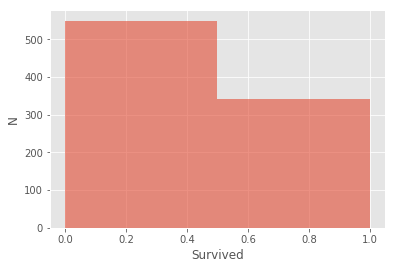

In [223]:
# 生死についてヒストグラムを描画(pandasのメソッド)
# ヒストグラム: 区間に含まれるデータの個数を表す。個数を柱の高さに反映させる
# - alpha: ヒストグラムの描画色の透過度
# - kind: 描画するグラフの種類（今回はヒストグラムを指定）
# - bins：ヒストグラムにおけるデータの区間の数（生死が取りうる値は0か1。区間は2つなので、0の数と1の数に分かれる）
train_df['Survived'].plot(alpha=0.6, kind='hist', bins=2)
plt.xlabel('Survived') # x軸ラベルの設定
plt.ylabel('N') # y軸ラベルの設定
plt.show() # これまでに設定したものを描画

- 左側: 0=死亡、右側: 1=生存
- 生存者（右側）は死亡者（左側）の半分くらい
- → 生存率は1/3くらい

`plot`  
参考: https://note.nkmk.me/python-pandas-plot/  
ドキュメント:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

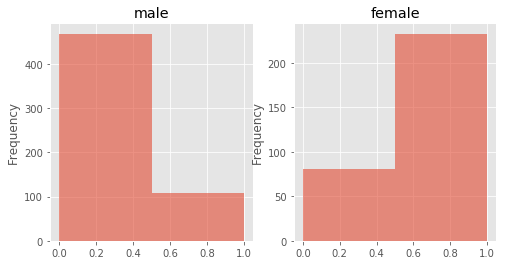

In [224]:
# 性別ごとに生死のヒストグラムを表示（ヒストグラムを横に並べて表示する）
# 描画領域と1つ1つのグラフを設定（描画領域はfig、グラフはaxesというリストに入れて一括で扱う）
# 1行2列の描画領域とし、1列目(左側)に男性の生死のヒストグラム、2列目(右側)に女性の生死のヒストグラムを表示
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

for i, sex in enumerate(['male', 'female']):
    # for文は2回回る。1回目: i=0, sex='male'    2回目: i=1, sex='female'
    # Survived列のうち該当するSexのレコードを抽出し、ヒストグラムを描画
    # 引数axに描画領域中の描画位置を指定（ここでは、axes[0]が左側、axes[1]が右側）
    # → つまり、左側に男性の生死のヒストグラム、右側に女性の生死のヒストグラム
    train_df[train_df['Sex']==sex]['Survived'].plot(alpha=0.6, kind='hist', bins=2, ax=axes[i])
    axes[i].set_title(sex)

plt.show()

- 男性の生存率は低い（左側より右側のほうが低い）
- 女性の生存率は高い（左側よりも右側のほうが高い）
- → 性別は生死を予測する際に有力な情報と考えられる
- 人数は男性の方が多い（男性550名、女性300名）

`train_df[train_df['Sex']==sex]['Survived']`  
train_dfの中で、Sexがsex(maleまたはfemale)と一致する行のうちのSurvived列を取り出している  
（続く`.plot`でヒストグラムを描画）  
  
参考: 列の取り出し https://note.nkmk.me/python-pandas-index-row-column/  
参考: 真偽値で行の取り出し https://note.nkmk.me/python-pandas-multiple-conditions/  
ドキュメント: 10 minutes pandasの中のSelection https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#selection


In [225]:
# 年齢の幅
print(f'min age: {train_df["Age"].min()}')
print(f'max age: {train_df["Age"].max()}')

min age: 0.42
max age: 80.0


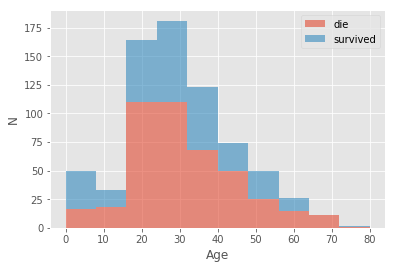

In [226]:
# 年齢のヒストグラム（生存／死亡数の積み上げ）を描画（どの年齢層が助かりやすいのか？）
# 欠損値は描画できないため、一時的に削除する（tmp_dfは欠損値を持たないが、train_dfは欠損値を持つ）
tmp_df = train_df.dropna(subset=['Age'])
# matplotlibのメソッドでヒストグラムを描画
# [死亡者の年齢、生存者の年齢]の順で渡している→同一区間で積み上げて描画される
# - range: ヒストグラムの範囲（0歳〜80歳）
# - stacked: 積み上げの有効無効設定
plt.hist([tmp_df[(tmp_df['Survived']==0)]['Age'],
          tmp_df[(tmp_df['Survived']==1)]['Age']],
          alpha=0.6, range=(0,80), bins=10, stacked=True,
          label=('Died', 'Survived'))
plt.legend(['die', 'survived'])
plt.xlabel('Age')
plt.ylabel('N')
plt.show()

0〜80歳を10分割なので、約8歳ずつ分割される  
助かっている割合が高い年齢層は0歳〜8歳（半数近い）

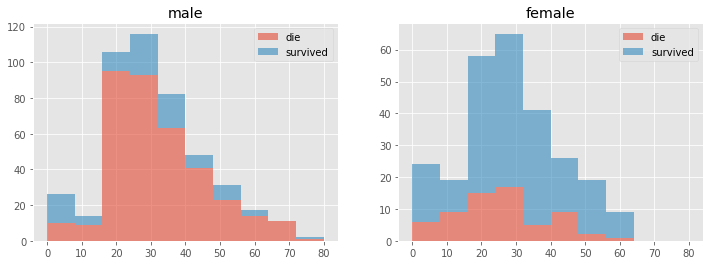

In [227]:
# 性別ごとに年齢のヒストグラム（生存／死亡数の積み上げ）を描画
# 欠損値は描画できないため、一時的に削除する（tmp_dfは欠損値を持たないが、train_dfは欠損値を持つ）
tmp_df = train_df.dropna(subset=['Age'])
# 描画領域を用意
fig = plt.figure(figsize=(12, 4))

for i, sex in enumerate(['male', 'female'], 1):
    # for文は2回回る。1回目: i=1, sex='male'    2回目: i=2, sex='female'
    # 1回目はヒストグラムを左側に描画、2回目は右側に描画
    ax = fig.add_subplot(1, 2, i)
    # 死亡者と生存者を積み上げたヒストグラム（ヒストグラムの柱の中で、生存／死亡の割合が見て取れる） 
    plt.hist([tmp_df[(tmp_df['Survived']==0) & (tmp_df['Sex']==sex)]['Age'],
          tmp_df[(tmp_df['Survived']==1) & (tmp_df['Sex']==sex)]['Age']],
          alpha=0.6, range=(0,80), bins=10, stacked=True,
          label=('Died', 'Survived'))
    plt.title(sex)
    plt.legend(['die', 'survived'])
plt.show()

- 男性は0歳~8歳が生存率が高い
- →性別以外に年齢も使えそう

- `tmp_df[(tmp_df['Survived']==0) & (tmp_df['Sex']==sex)]['Age']`
    - **死亡**かつSexがsex(maleまたはfemale)と一致する行のうちのAge列
- `tmp_df[(tmp_df['Survived']==1) & (tmp_df['Sex']==sex)]['Age']`
    - **生存**かつSexがsex(maleまたはfemale)と一致する行のうちのAge列

リストに[死亡、生存]の順で格納し、`plt.hist()`で死亡、生存それぞれについてヒストグラムを描画  
描画されるヒストグラムは積み重ねられる  
ドキュメント: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

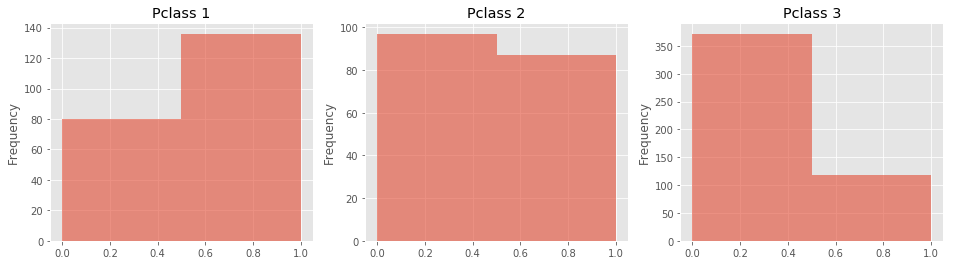

In [228]:
# チケット等級ごとに生死のヒストグラムを表示（ヒストグラムを横に並べて表示する）
# 1行3列の描画領域とする
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

for i, pclass in enumerate([1, 2, 3]):
    # for文は3回回る。1回目: i=0, pclass=1    2回目: i=1, pclass=2    3回目: i=0, pclass=3
    # Survived列のうち該当するpclassのレコードを抽出し、ヒストグラムを描画
    # 左側にpclass=1の生死のヒストグラム、中央にpclass=2の生死のヒストグラム、右側にpclass=3の生死のヒストグラム
    train_df[train_df['Pclass']==pclass]['Survived'].plot(alpha=0.6, kind='hist', bins=2, ax=axes[i])
    axes[i].set_title(f'Pclass {pclass}')

plt.show()

- Pclass=1は生存者が過半数を超えている
- Pclass=2は生存者が半分程度
- Pclass=3は生存者が少ない（4分の1程度）
- →Pclassも生死の予測に使える
- 人数の多い順に並べると、Pclass=3(500名), 1(220名), 2（180名）

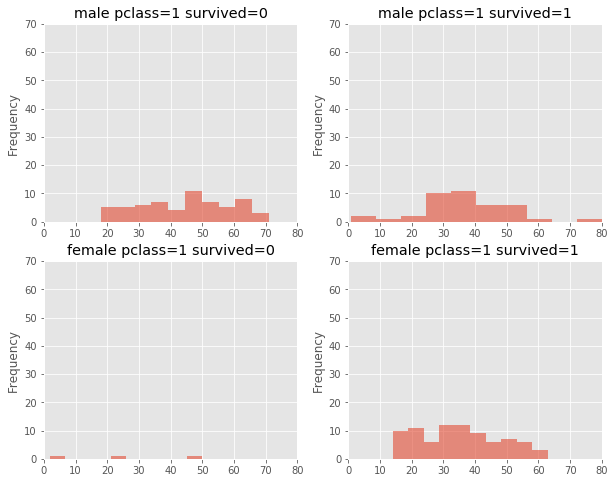

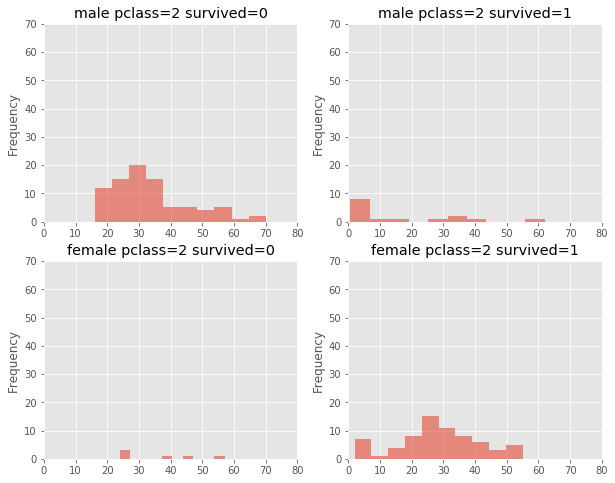

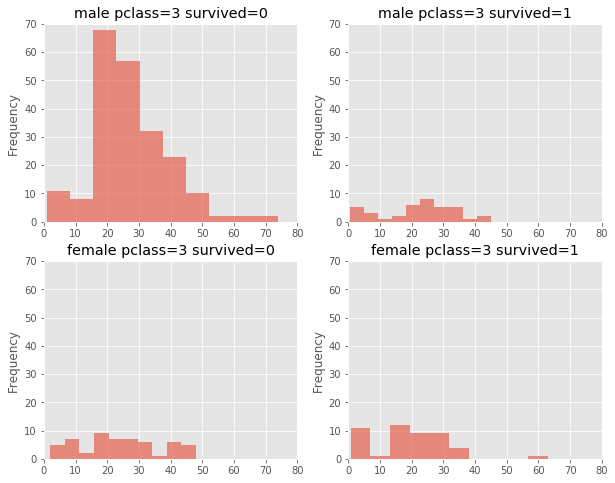

In [229]:
# 参考: 性別／チケット等級／生死の組合せ全てに対して年齢のヒストグラムを描画
tmp_df = train_df.dropna(subset=['Age'])
for pclass in [1, 2, 3]:
    # 描画領域の中に2行2列でヒストグラムを配置するための設定
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[10, 8])
    sex_n = 0 # axesのインデックスとなる
    for sex in ['male', 'female']:
        for survived in [0, 1]:
            # Survived, Sex, Pclassが該当するデータの抽出
            draw_df = tmp_df[((tmp_df['Survived']==survived) & (tmp_df['Sex']==sex) & (tmp_df['Pclass']==pclass))]
            fig = draw_df['Age'].plot(alpha=0.6, kind='hist', bins=10, xlim=(0, 80), ylim=(0, 70), ax=axes[sex_n][survived]) # 該当するデータの範囲内でbinを10等分している
            fig.set_title(f'{sex} pclass={pclass} survived={survived}')
        sex_n += 1
    plt.show()


- pclass=2のmaleは0歳〜10歳（若い層）が生存
- pclass=3のfemaleはpclass=1,2のfemaleと比べて助からない人も多い（半々くらい）

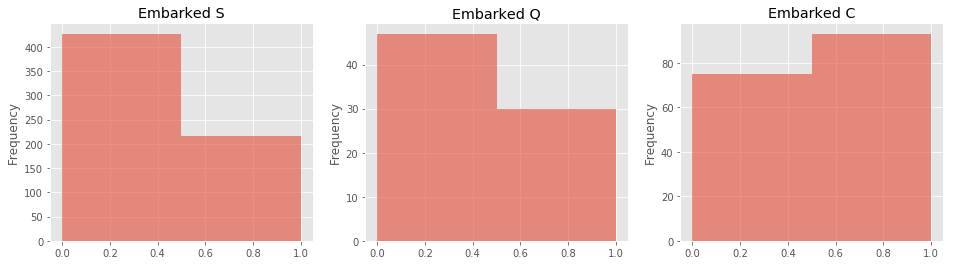

In [230]:
# 乗船港ごとに生死のヒストグラムを表示（ヒストグラムを横に並べて表示する）
# 1行3列の描画領域とする
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

for i, embarked in enumerate(['S', 'Q', 'C']):
    # for文は3回回る。1回目: i=0, embarked='S'    2回目: i=1, embarked='Q'    3回目: i=0, embarked='C'
    # Survived列のうち該当するembarkedのレコードを抽出し、ヒストグラムを描画
    # 左側にpclass=1の生死のヒストグラム、中央にpclass=2の生死のヒストグラム、右側にpclass=3の生死のヒストグラム
    train_df[train_df['Embarked']==embarked]['Survived'].plot(alpha=0.6, kind='hist', bins=2, ax=axes[i])
    axes[i].set_title(f'Embarked {embarked}')

plt.show()

- 港Cは生存者が半分程度
- 港S, Qは生存者が3分の1程度
- →Embarkedも生死の予測に加えてみる

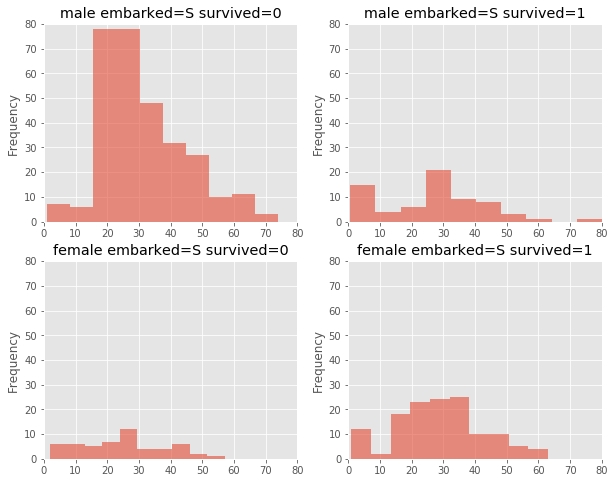

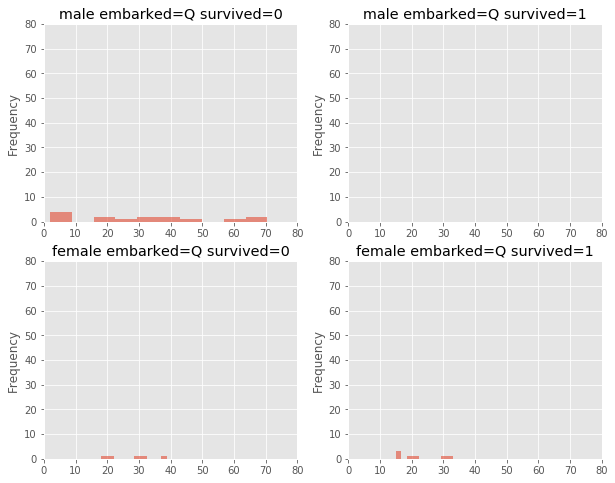

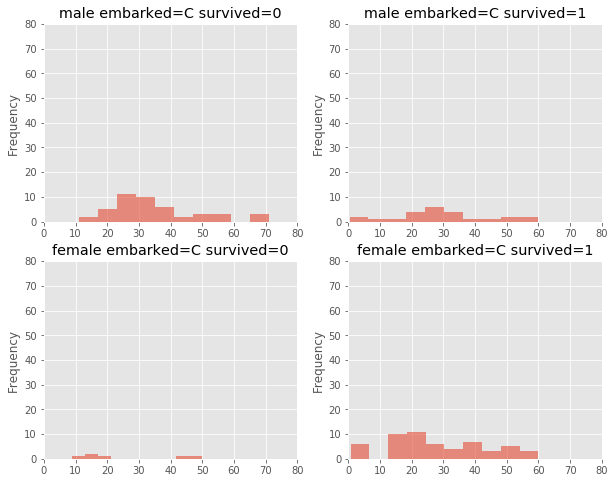

In [231]:
# 参考: 性別／チケット等級／生死の組合せ全てに対して年齢のヒストグラムを描画
tmp_df = train_df.dropna(subset=['Age'])
for embarked in ['S', 'Q', 'C']:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[10, 8])
    sex_n = 0
    for sex in ['male', 'female']:
        for survived in [0, 1]:
            # Survived, Sex, Embarkedが該当するデータの抽出
            draw_df = tmp_df[((tmp_df['Survived']==survived) & (tmp_df['Sex']==sex) & (tmp_df['Embarked']==embarked))]
            fig = draw_df['Age'].plot(alpha=0.6, kind='hist', bins=10, xlim=(0, 80), ylim=(0, 80), ax=axes[sex_n][survived]) # 該当するデータの範囲内でbinを10等分している
            fig.set_title(f'{sex} embarked={embarked} survived={survived}')
        sex_n += 1
    plt.show()

- 港Qで乗船した人はほとんどが男性で死亡している

## 2-A. 前処理

1. 欠損値
1. カテゴリ変数

In [232]:
# ここまでの分析を元に、以下の4つの情報から生死を予測することにする
columns = ['Age', 'Pclass', 'Sex', 'Embarked']

In [233]:
# モデルが予測に使う情報をX, モデルが予測する情報（ここでは生死）をyとする（Xとyという変数名が多い）
X = train_df[columns].copy()
y = train_df['Survived']
# 予測対象データについて、予測に使う情報を取り出しておく
X_test = test_df[columns].copy()

In [234]:
X.head()

,Age,Pclass,Sex,Embarked
0,22.0,3,male,S
1,38.0,1,female,C
2,26.0,3,female,S
3,35.0,1,female,S
4,35.0,3,male,S


In [235]:
# モデル作成用データの欠損値の確認
X.isnull().sum()

Age         177
Pclass        0
Sex           0
Embarked      2
dtype: int64

In [236]:
# 予測対象データの欠損値の確認
X_test.isnull().sum()

Age         86
Pclass       0
Sex          0
Embarked     0
dtype: int64

`isnull().sum()`  
参考: https://note.nkmk.me/python-pandas-nan-judge-count/

欠けたデータがある列

| データ種別 | 列名 | 欠け具合 |
| ----- | ----- | ----- |
| モデル作成用・性能評価用 | **Age** | 20%程度 |
| モデル作成用 | **Embarked** | 数件 |

- 欠けたデータ＝**欠損値**（missing value、欠測値とも呼ばれる）  
- 欠損の要因：データの収集過程で抜けてしまったなど
- 機械学習のツールは **一般に欠損値に対処できない**（そのためデータを前処理する）
- 削除すると貴重なデータが減るので、**埋める**

### 2-A 1.欠損値を埋める

- Age
- Embarked

埋めるのに使うデータ

- Age: モデル作成用データの平均値（=年齢の総和/個数）
- Embarked: モデル作成用データで一番多く登場する値（一番多くの人が乗っている港）

In [237]:
# Ageの欠損を平均値で埋める
# **Note**: モクモクタイムで他の埋め方を試す際は、このセルを置き換えます
#age_mean = X['Age'].mean()
#print(f'Age mean: {age_mean}')
#
#X['AgeFill'] = X['Age'].fillna(age_mean)
#X_test['AgeFill'] = X_test['Age'].fillna(age_mean)

males_age = X[X['Sex'] == 'male']['Age'].mean()
X[X['Sex'] == 'female']['AgeFill'] = X[X['Sex'] == 'female']['Age'].fillna(males_age)
X_test[X['Sex'] == 'female']['AgeFill'] = X_test['Age'].fillna(age_mean)

females_age = X[X['Sex'] == 'female']['Age'].mean()
X[X['Sex'] == 'female']['AgeFill'] = X[X['Sex'] == 'female']['Age'].fillna(males_age)
X_test[X['Sex'] == 'female']['AgeFill'] = X_test['Age'].fillna(age_mean)

/Users/armeria/.pyenv/versions/anaconda3-5.3.0/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/armeria/.pyenv/versions/anaconda3-5.3.0/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/Users/armeria/.pyenv/versions/anaconda3-5.3.0/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

`mean`  
参考: https://deepage.net/features/pandas-mean.html  
ドキュメント: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mean.html

`fillna`  
参考: https://note.nkmk.me/python-pandas-nan-dropna-fillna/  
ドキュメント: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [238]:
# 欠損を含むAge列を削除（年齢の情報はAgeFill列を参照する）
X = X.drop(['Age'], axis=1)
X_test = X_test.drop(['Age'], axis=1)

`drop`  
参考: https://note.nkmk.me/python-pandas-drop/  
ドキュメント: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [239]:
# Embarkedの欠損値を埋める
embarked_freq = X['Embarked'].mode()[0]
print(f'Embarked freq: {embarked_freq}')
X['Embarked'] = X['Embarked'].fillna(embarked_freq)
# X_testにEmbarkedの欠損値がないため、実施しない

Embarked freq: S


`mode`  
参考: https://note.nkmk.me/python-pandas-mode/  
ドキュメント: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mode.html

In [240]:
# モデル作成用データの欠損値(Embarked, AgeFill)が埋まったことを確認
X.isnull().sum()

Pclass      0
Sex         0
Embarked    0
dtype: int64

In [241]:
# 予測対象データの欠損値が埋まったことを確認
X_test.isnull().sum()

Pclass      0
Sex         0
Embarked    0
dtype: int64

### 1-A 2.カテゴリ変数を数値化する

- Sex（male, female）
- Embarked(S, Q, C)

- カテゴリ変数とは、いくつかの文字列の値を取る変数
    - Sex: male, female
    - Embarked: S, Q, C　（乗船した港の頭文字）
- 文字列を整数に変換する
    - Sex: male=1, female=0として置き換え
    - Embarked: ダミー変数化（後述）

In [242]:
# 性別（female/male）を0/1に変換する（maleとfemaleのままではsklearnが扱えない）
# カテゴリを整数に置き換えるための辞書を用意
gender_map = {'female': 0, 'male': 1}
# 引数の辞書のキー（コロンの左側）に一致する要素が、辞書の値（コロンの右側）に置き換わる（femaleが1に置き換わり、maleが0に置き換わる）
# 注: Sexの取りうる値はfemaleかmale
X['Gender'] = X['Sex'].map(gender_map).astype(int)
X_test['Gender'] = X_test['Sex'].map(gender_map).astype(int)

`map`  
参考: https://note.nkmk.me/python-pandas-map-replace/  
ドキュメント: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html

In [243]:
# Sexに代えてGenderを使うため、Sex列を削除する
X = X.drop(['Sex'], axis=1)
X_test = X_test.drop(['Sex'], axis=1)

Embarkedのダミー変数化について

- S=1, Q=2, C=3と整数に置き換える
    - **本来なかった大小関係が想定されてしまう**
- (S, Q, C)という形式で整数に置き換える

| Embarkedの値 | 置き換えたあと |
| ----- | ----- |
| S | (1, 0, 0) |
| Q | (0, 1, 0) |
| C | (0, 0, 1) |

In [244]:
# Embarked（S, Q, Cという3カテゴリ）をダミー変数にする
# （Embarked列が消え、Embarked_S, Embarked_Q, Embarked_C列が追加される）
X = pd.get_dummies(X, columns=['Embarked'])
X_test = pd.get_dummies(X_test, columns=['Embarked'])

`get_dummies`  
参考: https://note.nkmk.me/python-pandas-get-dummies/  
ドキュメント: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [245]:
# 前処理したモデル作成用データの確認
X.head()

,Pclass,Gender,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,0,1
1,1,0,1,0,0
2,3,0,0,0,1
3,1,0,0,0,1
4,3,1,0,0,1


In [246]:
# 前処理した予測対象データの確認
X_test.head()

,Pclass,Gender,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,1,0
1,3,0,0,0,1
2,2,1,0,1,0
3,3,1,0,0,1
4,3,0,0,0,1


## 2-B. モデル作成

モデルはモデル作成用データにアルゴリズムを適用して作成する。  
今回はアルゴリズムにロジスティック回帰を使う（後ほど変更も試せます）  

ドキュメント(ロジスティック関数): https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html

In [247]:
# モデル作成・性能評価に使うモジュールの読み込み
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

このあとモデルを作成するが、予測対象データについて生死を予測する前に、  
どの程度の性能のモデルなのか確認したい。  
→モデル作成用データをランダムに2つに分ける（`train_test_split`）

- モデル作成用データのうち、例えば7割でモデルを作る
- 残りの3割でモデルの性能を評価する

参考情報

- ランダムに分けているが、`random_state`引数の値が同じなら、**何回実行しても同じ** ようにランダムに分かれる

In [248]:
# 今回のハンズオンは7:3に分けて進める
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

`train_test_split`  
参考: https://docs.pyq.jp/python/machine_learning/tips/train_test_split.html  
ドキュメント: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

| 変数名 | 用途 |
| ----- | ----- |
| X_train | モデル作成用のデータ（乗客の属性） |
| y_train | モデル作成用のデータ（生死） |
| X_val | モデルの性能確認用のデータ（乗客の属性） |
| y_val | モデルの性能確認用のデータ（生死） |

In [249]:
X_train

,Pclass,Gender,Embarked_C,Embarked_Q,Embarked_S
114,3,0,1,0,0
874,2,0,1,0,0
76,3,1,0,0,1
876,3,1,0,0,1
674,2,1,0,0,1
132,3,0,0,0,1
605,3,1,0,0,1
791,2,1,0,0,1
58,2,0,0,0,1
246,3,0,0,0,1


In [250]:
len(X_train)

623

In [251]:
# モデル作成用のデータの数の確認
len(y_train)

623

In [252]:
# モデル性能確認用のデータの数の確認
len(y_val)

268

In [253]:
#from sklearn.neighbors import KNeighborsClassifier
#model = KNeighborsClassifier(n_neighbors=1)
#model.fit(X_train, y_train)

# 決定木というアルゴリズムを使ったモデルを用意
model = DecisionTreeClassifier(random_state=1, criterion='entropy', max_depth=3, min_samples_leaf=2)
# モデル作成は以下の1行（ここまでの前処理に対してたった1行！）で完了する
model.fit(X_train, y_train)

# ロジスティック回帰というアルゴリズムを使ったモデルを用意
#model = LogisticRegression(random_state=1, solver='liblinear')
# モデル作成は以下の1行（ここまでの前処理に対してたった1行！）で完了する
#model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

## 2-C. 性能確認

タイタニックの場合、モデルの性能はaccuracyというスコアで評価される  
（**注**：性能を表すスコアは他にもある）

- 418名のうち生死を正しく予想できたものの割合
- 1に近いほど性能がよい

| ケース | 正解／誤り |
| ----- | ----- |
| 生存した乗客を生存と予測 | 正解 |
| 生存した乗客を死亡と予測 | 誤り |
| 死亡した乗客を生存と予測 | 誤り |
| 死亡した乗客を死亡と予測 | 正解 |

accuracy = (正解の総数) / (正解の総数 + 誤りの総数)

>Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy”.

ref: https://www.kaggle.com/c/titanic#evaluation

In [254]:
# モデル性能確認用データについて生死を予測
pred = model.predict(X_val)
# accuracyを算出して表示
accuracy_score(y_val, pred)

0.7611940298507462

`accuracy_score`  
ドキュメント: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

初回はすぐ提出。  
別のモデルを作ったときに、以前に作ったモデルよりスコアが低ければ、提出しないという判断ができる  
（Kaggleに提出しなくても試行錯誤が進められる。提出回数には日次の上限がある）

## 3. 予測対象データの生死を予測

- 予測対象データ（418件）について予測したあと、提出用データを作る
- 提出用データは以下の形式のCSVとするように指定されている（1が生存、0が死亡）

PassengerId | Survived
----- | -----
892 | 0
: | :
1309|1

- ref: https://www.kaggle.com/c/titanic#evaluation

In [210]:
# 予測対象データについて生死を予測
pred = model.predict(X_test)

In [211]:
# 提出用データの形式に変換
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': pred
})
# 提出用データ作成
submission.to_csv('submission.csv', index=False)

## 参考: 提出練習データを提出してみる

In [54]:
# 以下のコードはお手元では実行不要です
# import pandas as pd
# gender_submission_df = pd.read_csv('../input/gender_submission.csv')
# gender_submission_df.to_csv('submission.csv', index=False)

## 精度を上げるために

精度が変わる方法（上がらない場合もあります）

- Ageの欠損の埋め方を見直す
- モデルのアルゴリズムを変える

### Ageの欠損の埋め方を見直す

- （案1） 中央値で埋める
- （案2） Sexに応じて年齢を埋める
- （案3） Pclassに応じて年齢を埋める

KernelをEditする際、平均値で埋めた部分を以下のいずれかに置き換えてみてください。  
現状コメント扱いにしているため、コードとして実行するには、始めと終わりの`"""`を削除する必要があります

In [56]:
# （案1） 中央値で埋める（年齢を大きい順に並べたときに中央に来る値。平均値とは異なる値となることが多い）
"""
age_median = X['Age'].median()
print(f'Age mean: {age_median}')
X['AgeFill'] = X['Age'].fillna(age_median)
X_test['AgeFill'] = X_test['Age'].fillna(age_median)
"""

"\nage_median = X['Age'].median()\nprint(f'Age mean: {age_median}')\nX['AgeFill'] = X['Age'].fillna(age_median)\nX_test['AgeFill'] = X_test['Age'].fillna(age_median)\n"

`median`  
ドキュメント: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.median.html

In [57]:
# (案2) 仮説: 年齢の平均値は性別ごとに違うのでは？
# AgeFill列を作る前に、性別ごとの年齢の平均値を確認
# X[['Sex', 'Age']].groupby('Sex').mean()

In [58]:
# （案2）確認すると、男性の平均年齢 31歳、女性の平均年齢 28歳
"""
def age_by_sex(col):
    '''col: [age, sex]と想定'''
    age, sex = col
    if pd.isna(age): # Ageが欠損の場合の処理
        if sex == 'male':
            return 31
        elif sex == 'female':
            return 28
        else: # 整数に変更したsexが含まれる場合など
            print('Sexがmale/female以外の値をとっています')
            return -1
    else: # Ageが欠損していない場合の処理
        return age
# train_dfからAgeとSexの2列を取り出し、各行についてage_by_sex関数を適用
# age_by_sex関数の返り値でAge列の値を上書きする（欠損の場合は、値が埋められる）
X['AgeFill'] = X[['Age', 'Sex']].apply(age_by_sex, axis=1)
X_test['AgeFill'] = X_test[['Age', 'Sex']].apply(age_by_sex, axis=1)
"""

"\ndef age_by_sex(col):\n    '''col: [age, sex]と想定'''\n    age, sex = col\n    if pd.isna(age): # Ageが欠損の場合の処理\n        if sex == 'male':\n            return 31\n        elif sex == 'female':\n            return 28\n        else: # 整数に変更したsexが含まれる場合など\n            print('Sexがmale/female以外の値をとっています')\n            return -1\n    else: # Ageが欠損していない場合の処理\n        return age\n# train_dfからAgeとSexの2列を取り出し、各行についてage_by_sex関数を適用\n# age_by_sex関数の返り値でAge列の値を上書きする（欠損の場合は、値が埋められる）\nX['AgeFill'] = X[['Age', 'Sex']].apply(age_by_sex, axis=1)\nX_test['AgeFill'] = X_test[['Age', 'Sex']].apply(age_by_sex, axis=1)\n"

In [59]:
# (案3) 仮説: 年齢の平均値はチケットの階級ごとに違うのでは？（年齢高い→お金持っている→いいチケット）
# AgeFill列を作る前に、チケットの等級ごとの年齢の平均値を確認
# X[['Pclass', 'Age']].groupby('Pclass').mean()

In [60]:
# （案3） pclass==1 38歳、pclass==2 30歳、pclass==3 25歳
"""
def age_by_pclass(col):
    '''col: [age, pclass]と想定'''
    age, pclass = col
    if pd.isna(age): # Ageが欠損の場合の処理
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        else: # pclass == 3に相当する
            return 25
    else: # Ageが欠損していない場合の処理
        return age
X['AgeFill'] = X[['Age', 'Pclass']].apply(age_by_pclass, axis=1)
X_test['AgeFill'] = X_test[['Age', 'Pclass']].apply(age_by_pclass, axis=1)
"""

"\ndef age_by_pclass(col):\n    '''col: [age, pclass]と想定'''\n    age, pclass = col\n    if pd.isna(age): # Ageが欠損の場合の処理\n        if pclass == 1:\n            return 38\n        elif pclass == 2:\n            return 30\n        else: # pclass == 3に相当する\n            return 25\n    else: # Ageが欠損していない場合の処理\n        return age\nX['AgeFill'] = X[['Age', 'Pclass']].apply(age_by_pclass, axis=1)\nX_test['AgeFill'] = X_test[['Age', 'Pclass']].apply(age_by_pclass, axis=1)\n"

`groupby`  
参考: https://note.nkmk.me/python-pandas-groupby-statistics/  
ドキュメント: http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

`isna`  
ドキュメント: http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isna.html

`apply`  
参考: https://note.nkmk.me/python-pandas-map-applymap-apply/  
ドキュメント: http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

### モデルのアルゴリズムを変える

決定木を試す  

参考: https://scikit-learn.org/stable/modules/tree.html#classification  
ドキュメント: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [48]:
"""
# 決定木というアルゴリズムを使ったモデルを用意
model = DecisionTreeClassifier(random_state=1, criterion='entropy', max_depth=3, min_samples_leaf=2)
# モデル作成は以下の1行（ここまでの前処理に対してたった1行！）で完了する
model.fit(X_train, y_train)
"""

"\n# 決定木というアルゴリズムを使ったモデルを用意\nmodel = DecisionTreeClassifier(random_state=1, criterion='entropy', max_depth=3, min_samples_leaf=2)\n# モデル作成は以下の1行（ここまでの前処理に対してたった1行！）で完了する\nmodel.fit(X_train, y_train)\n"

### 変更履歴
https://www.kaggle.com/ftnext/kaggle-spzcolab-201901 をベースにデータの分析コンテンツを加えてアップデートした  
ref: https://github.com/PyDataTokyo/pydata-tokyo-tutorial-1